In [ ]:
# 导入数据
# 1. 大盘数据（SP500， 上证， 欧洲三傻）
# 2. SP500成分股（表格）
# 3. 个股数据（表格）
# 4. 个股 股价数据
# 5. 选取top 10和bottom 10的股票

In [1]:
import requests
import pandas as pd
import time
import yfinance as yf
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### tool

In [3]:
def generate_SP500_index(interval='1d', category='Close'):
      """
      Generates SP500 index data and saves it to a CSV file.

      Parameters:
            interval (str, optional): The interval to download the data with. 
                  Options are:
                  '1d' = daily data
                  '1wk' = weekly data
                  '1mo' = monthly data
                  Default is '1d'.
            category (str, optional): The category of data to include in the data frame. 
                  Options are:
                  'Open'
                  'High'
                  'Low'
                  'Close'
                  'Adj Close'
                  'Volume'
                  Default is 'Close'.
            save_path (str, optional): The path to the directory where the CSV file will be saved. 
                  Default is None.
      """
      
      index_dict = {
            'original': '^GSPC',
            'energy': '^GSPE',
            'industry': '^SP500-20',
            'consumer': '^SP500-30'
      }
      for index in index_dict.keys():

            symbol = index_dict[index]
            df = yf.download([symbol], group_by='ticker', interval=interval)
            df = df[[category]]
            df = df.reset_index()
            df = df.rename(columns = {'Date': 'date'})
            df['date'] = df['date'].astype(str).str[:10]
            df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
            if not os.path.exists(os.getcwd()+'/data'):
                  os.makedirs(os.getcwd()+'/data')   
            df.to_csv('data/'+'SP500_'+index+'.csv', index=False)
            print('SP500_'+index+'.csv', 'is saved in', os.getcwd()+'/data')

In [5]:
def subset(df, start_time, end_time):
      """
      Subset a data frame based on a specified time range.

      Parameters:
            df (pandas.DataFrame): The data frame to subset.
            start_time (str): The start time in the format 'YYYY-MM-DD' or 'YYYY-MM'.
            end_time (str): The end time in the format 'YYYY-MM-DD' or 'YYYY-MM'.

      Returns:
            pandas.DataFrame: The subset of the data frame.
      """
      try:
      # Check if the data frame has a column named 'date'
            if 'date' not in df.columns:
                  raise ValueError("Input data frame does not have a 'date' column.")

            # Subset the data frame based on the specified time range
            selected_df = df[(df['date'] >= start_time) & (df['date'] <= end_time)]
            return selected_df
      except KeyError as ke:
            print("KeyError:", str(ke))
      except TypeError as te:
            print("TypeError:", str(te))
      except Exception as e:
            print("An error occurred while subsetting the data frame:", str(e))

In [4]:
generate_SP500_index()

[*********************100%***********************]  1 of 1 completed
SP500_original.csv is saved in /Users/gawain/Data_551_project/data
[*********************100%***********************]  1 of 1 completed
SP500_energy.csv is saved in /Users/gawain/Data_551_project/data
[*********************100%***********************]  1 of 1 completed
SP500_industry.csv is saved in /Users/gawain/Data_551_project/data
[*********************100%***********************]  1 of 1 completed
SP500_consumer.csv is saved in /Users/gawain/Data_551_project/data


In [2]:
def read_df(path):
      df = pd.read_csv(path)
      df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
      return df

In [3]:
def subset(df, start_time, end_time):
      """
      Subset a data frame based on a specified time range.

      Parameters:
            df (pandas.DataFrame): The data frame to subset.
            start_time (str): The start time in the format 'YYYY-MM-DD' or 'YYYY-MM'.
            end_time (str): The end time in the format 'YYYY-MM-DD' or 'YYYY-MM'.

      Returns:
            pandas.DataFrame: The subset of the data frame.
      """
      try:
      # Check if the data frame has a column named 'date'
            if 'date' not in df.columns:
                  raise ValueError("Input data frame does not have a 'date' column.")

            # Subset the data frame based on the specified time range
            selected_df = df[(df['date'] >= start_time) & (df['date'] <= end_time)]
            return selected_df
      except KeyError as ke:
            print("KeyError:", str(ke))
      except TypeError as te:
            print("TypeError:", str(te))
      except Exception as e:
            print("An error occurred while subsetting the data frame:", str(e))

**保险起见我只选取从2010年之后的数据**

In [14]:
df_original = read_df('data/SP500_original.csv')
df_energy = read_df('data/SP500_energy.csv')
df_industry = read_df('data/SP500_industry.csv')
df_consumer = read_df('data/SP500_consumer.csv')

df_original = subset(df_original, '2010-01-01', '2023-02-18')
df_energy = subset(df_energy, '2010-01-01', '2023-02-18')
df_industry = subset(df_industry, '2010-01-01', '2023-02-18')
df_consumer = subset(df_consumer, '2010-01-01', '2023-02-18')

In [20]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2769 entries, 20593 to 23361
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2769 non-null   datetime64[ns]
 1   Close   2769 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 64.9 KB


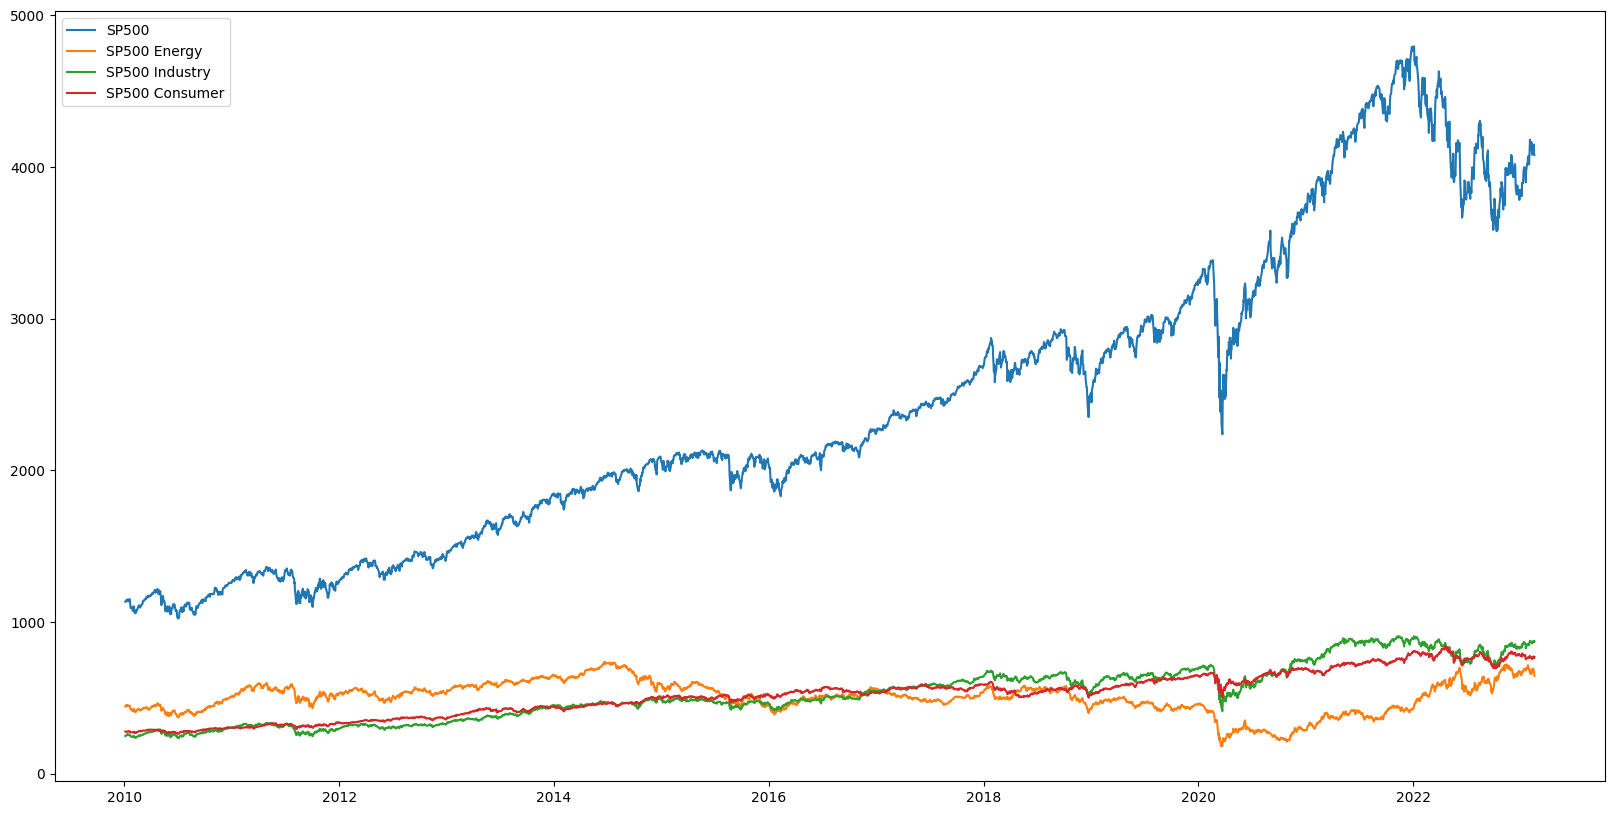

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(df_original['date'], df_original['Close'], label='SP500')
plt.plot(df_energy['date'], df_energy['Close'], label='SP500 Energy')
plt.plot(df_industry['date'], df_industry['Close'], label='SP500 Industry')
plt.plot(df_consumer['date'], df_consumer['Close'], label='SP500 Consumer')
plt.legend()
plt.show()

In [8]:
import plotly.graph_objects as go

In [17]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_original['date'], y=df_original['Close'], name='SP500'))
fig.add_trace(go.Scatter(x=df_energy['date'], y=df_energy['Close'], name='SP500 Energy'))
fig.add_trace(go.Scatter(x=df_industry['date'], y=df_industry['Close'], name='SP500 Industry'))
fig.add_trace(go.Scatter(x=df_consumer['date'], y=df_consumer['Close'], name='SP500 Consumer'))

fig.add_shape(type='line',
                  x0='2022-01-01',
                  y0=0,
                  x1='2022-01-01',
                  y1=1,
                  line=dict(color='red', width=2, dash='dash'))

fig.update_layout(
      title='Stock Prices',
      xaxis_title='Date',
      yaxis_title='Price'
)

fig.show()

### Sp500 个股信息

In [ ]:
# import requests
from bs4 import BeautifulSoup
# import pandas as pd

In [33]:
def SP500_co_info():

      # Send a request to the URL and get the HTML content
      url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
      response = requests.get(url)
      html_content = response.content

      # Parse the HTML content using BeautifulSoup
      soup = BeautifulSoup(html_content, 'html.parser')

      # Find the table containing the data
      table = soup.find('table', {'class': 'wikitable sortable', 'id': 'constituents'})

      # Extract the data from the table and put it into a list
      data = []
      for row in table.find_all('tr')[1:]:
            cols = row.find_all('td')
            symbol = cols[0].text.strip()
            security = cols[1].text.strip()
            sector = cols[2].text.strip()
            sub_industry = cols[3].text.strip()
            location = cols[4].text.strip()
            date_added = cols[5].text.strip()
            cik = cols[6].text.strip()
            founded = cols[7].text.strip()
            data.append([symbol, security, sector, sub_industry, location, date_added, cik, founded])

      # Convert the list of data into a Pandas DataFrame
      columns = ['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location', 'Date added', 'CIK', 'Founded']
      df = pd.DataFrame(data, columns=columns)

      # Display the DataFrame
      df.to_csv('data/SP500_co_info.csv', index=False)

In [34]:
SP500_co_info()

In [35]:
SP500_df = pd.read_csv('data/SP500_co_info.csv')
SP500_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [37]:
SP500_Companies_name = SP500_df['Symbol'].tolist()
SP500_Companies_name[:10]

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP']

### SP500 个股信息

In [48]:
name = SP500_Companies_name[0]
df = yf.download([name], group_by='ticker', interval='1d', start="2010-01-01", end="2023-02-18")
df = df.reset_index()
df.head()

# if not os.path.exists(os.getcwd()+'/data/SP500_company'):
#       os.makedirs(os.getcwd()+'/data/SP500_company')  

# df.to_csv('data/SP500_company/'+i+'.csv', index=False)
# print(i+'.csv', 'is saved in', os.getcwd()+'/dataSP500_company/')

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,83.089996,83.449997,82.669998,83.019997,56.705288,3043700
1,2010-01-05,82.800003,83.230003,81.699997,82.500000,56.350147,2847000
2,2010-01-06,83.879997,84.599998,83.510002,83.669998,57.149292,5268500
3,2010-01-07,83.320000,83.760002,82.120003,83.730003,57.190269,4470100
4,2010-01-08,83.690002,84.320000,83.300003,84.320000,57.593239,3405800


In [49]:
for i in SP500_Companies_name:
      df = yf.download([i], group_by='ticker', interval='1d', start="2010-01-01", end="2023-02-18")
      df = df.reset_index()
      if not os.path.exists(os.getcwd()+'/data/SP500_company'):
            os.makedirs(os.getcwd()+'/data/SP500_company')  

      df.to_csv('data/SP500_company/'+i+'.csv', index=False)
      print(i+'.csv', 'is saved in', os.getcwd()+'/dataSP500_company/')

[*********************100%***********************]  1 of 1 completed
MMM.csv is saved in /Users/gawain/Data_551_project/dataSP500_company/
[*********************100%***********************]  1 of 1 completed
AOS.csv is saved in /Users/gawain/Data_551_project/dataSP500_company/
[*********************100%***********************]  1 of 1 completed
ABT.csv is saved in /Users/gawain/Data_551_project/dataSP500_company/
[*********************100%***********************]  1 of 1 completed
ABBV.csv is saved in /Users/gawain/Data_551_project/dataSP500_company/
[*********************100%***********************]  1 of 1 completed
ACN.csv is saved in /Users/gawain/Data_551_project/dataSP500_company/
[*********************100%***********************]  1 of 1 completed
ATVI.csv is saved in /Users/gawain/Data_551_project/dataSP500_company/
[*********************100%***********************]  1 of 1 completed
ADM.csv is saved in /Users/gawain/Data_551_project/dataSP500_company/
[*********************100

In [65]:
for i in SP500_Companies_name[:3]:
      df = pd.read_csv('data/SP500_company/'+i+'.csv')
      df = df[['Date', 'Close']]
      df.columns = ['date', 'Close']
      df_info = SP500_df[SP500_df['Symbol'] == i]
      info = df_info[['Symbol','Security', 'GICS Sector', 'GICS Sub-Industry']].values
      for i in info:
            print('Symbol:', i[0])
            print('Security:', i[1])
            print('GICS Sector:', i[2])
            print('GICS Sub-Industry:', i[3])
      print(df.tail(3))
      print('-----------------')
      # df.to_csv('data/SP500_company/'+i+'.csv', index=False)
      # print(i+'.csv', 'is saved in', os.getcwd()+'/dataSP500_company/')

Symbol: MMM
Security: 3M
GICS Sector: Industrials
GICS Sub-Industry: Industrial Conglomerates
            date       Close
3302  2023-02-15  114.790001
3303  2023-02-16  112.000000
3304  2023-02-17  112.989998
-----------------
Symbol: AOS
Security: A. O. Smith
GICS Sector: Industrials
GICS Sub-Industry: Building Products
            date      Close
3302  2023-02-15  68.029999
3303  2023-02-16  67.720001
3304  2023-02-17  67.239998
-----------------
Symbol: ABT
Security: Abbott
GICS Sector: Health Care
GICS Sub-Industry: Health Care Equipment
            date       Close
3302  2023-02-15  107.279999
3303  2023-02-16  106.080002
3304  2023-02-17  106.739998
-----------------


In [50]:
A_df = pd.read_csv('data/SP500_company/A.csv')
A_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,22.453505,22.625179,22.267525,22.389128,20.301357,3815561
1,2010-01-05,22.324751,22.331903,22.002861,22.145924,20.080833,4186031
2,2010-01-06,22.067240,22.174536,22.002861,22.067240,20.009481,3243779
3,2010-01-07,22.017166,22.045780,21.816881,22.038628,19.983534,3095172
4,2010-01-08,21.917025,22.067240,21.745352,22.031473,19.977047,3733918


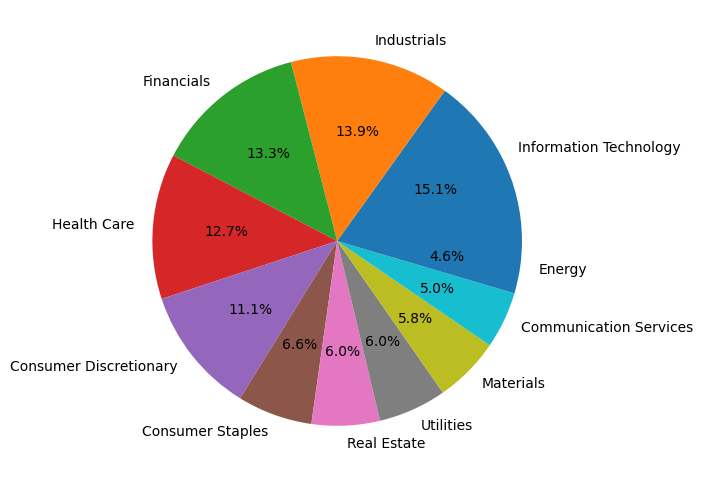

In [68]:
# count the number of GICS Sector in SP500_df, and plot it
group_count = SP500_df.groupby('GICS Sector').count().sort_values(by='Symbol', ascending=False)

plt.figure(figsize=(12, 6))
# pie chart
plt.pie(group_count['Symbol'], labels=group_count.index, autopct='%1.1f%%')
plt.show()


### SP500 个股信息合并

In [92]:
# create new df with columns: date， close， symbol，  GICS Sector， GICS Sub-Industry in both SP500_df and each company df
merged_df_whole = pd.DataFrame(columns=['Date', 'Close', 'Volume' ,'Symbol', 'GICS Sector', 'GICS Sub-Industry'])
count = 0
for i in SP500_Companies_name:
      if count != len(SP500_Companies_name):
            merged_df = pd.DataFrame(columns=['Date', 'Close', 'Volume' ,'Symbol', 'GICS Sector', 'GICS Sub-Industry'])
            price_df = pd.read_csv('data/SP500_company/'+i+'.csv')
            merged_df['Date'] = price_df['Date']
            merged_df['Close'] = price_df['Close']
            merged_df['Volume'] = price_df['Volume']
            merged_df['Symbol'] = i
            merged_df['GICS Sector'] = SP500_df[SP500_df['Symbol'] == i]['GICS Sector'].values[0]
            merged_df['GICS Sub-Industry'] = SP500_df[SP500_df['Symbol'] == i]['GICS Sub-Industry'].values[0]
            merged_df = merged_df.dropna()
            
            merged_df_whole = pd.concat([merged_df_whole, merged_df], axis=0)
            print(i, 'is merged')
            count = count + 1
      else:
            break

merged_df_whole.to_csv('data/SP500_merged.csv', index=False)
# merged_df

MMM is merged
AOS is merged
ABT is merged
ABBV is merged
ACN is merged
ATVI is merged
ADM is merged
ADBE is merged
ADP is merged
AAP is merged
AES is merged
AFL is merged
A is merged
APD is merged
AKAM is merged
ALK is merged
ALB is merged
ARE is merged
ALGN is merged
ALLE is merged
LNT is merged
ALL is merged
GOOGL is merged
GOOG is merged
MO is merged
AMZN is merged
AMCR is merged
AMD is merged
AEE is merged
AAL is merged
AEP is merged
AXP is merged
AIG is merged
AMT is merged
AWK is merged
AMP is merged
ABC is merged
AME is merged
AMGN is merged
APH is merged
ADI is merged
ANSS is merged
AON is merged
APA is merged
AAPL is merged
AMAT is merged
APTV is merged
ACGL is merged
ANET is merged
AJG is merged
AIZ is merged
T is merged
ATO is merged
ADSK is merged
AZO is merged
AVB is merged
AVY is merged
BKR is merged
BALL is merged
BAC is merged
BBWI is merged
BAX is merged
BDX is merged
WRB is merged
BRK.B is merged
BBY is merged
BIO is merged
TECH is merged
BIIB is merged
BLK is merged


In [93]:
final_df = pd.read_csv('data/SP500_merged.csv')
final_df.head()

,Date,Close,Volume,Symbol,GICS Sector,GICS Sub-Industry
0,2010-01-04,83.019997,3043700,MMM,Industrials,Industrial Conglomerates
1,2010-01-05,82.500000,2847000,MMM,Industrials,Industrial Conglomerates
2,2010-01-06,83.669998,5268500,MMM,Industrials,Industrial Conglomerates
3,2010-01-07,83.730003,4470100,MMM,Industrials,Industrial Conglomerates
4,2010-01-08,84.320000,3405800,MMM,Industrials,Industrial Conglomerates


In [94]:
final_df.tail()

,Date,Close,Volume,Symbol,GICS Sector,GICS Sub-Industry
1584042,2023-02-13,163.139999,2349200,ZTS,Health Care,Pharmaceuticals
1584043,2023-02-14,171.899994,3532400,ZTS,Health Care,Pharmaceuticals
1584044,2023-02-15,175.020004,2510800,ZTS,Health Care,Pharmaceuticals
1584045,2023-02-16,173.929993,1951100,ZTS,Health Care,Pharmaceuticals
1584046,2023-02-17,172.029999,1954500,ZTS,Health Care,Pharmaceuticals
